# Diabetes Prediction: Model Comparison
This notebook performs:
- Preliminary Data Analysis (PDA)
- Train-Test Split
- Training Seven Different Models
- Comparing Their Accuracy
- Conducting a Comparative Study

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


df = pd.read_csv('diabetes.csv')
df['Outcome'] = df['Outcome'].map({'Non Diabetic': 0, 'Diabetic': 1})


display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


C:\Users\PRINCE\AppData\Local\Temp\ipykernel_22824\850329217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Outcome'], palette='viridis')


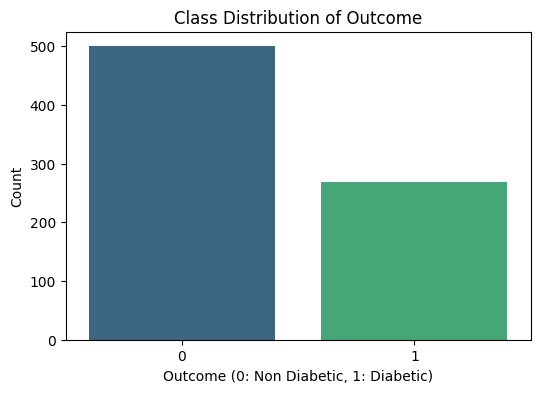

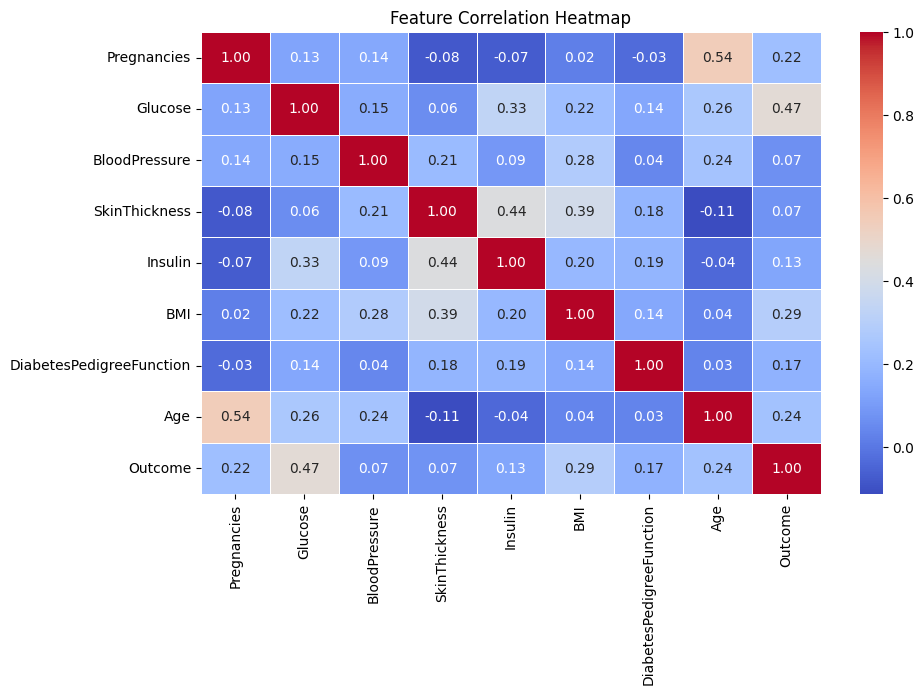

In [ ]:

plt.figure(figsize=(6,4))
sns.countplot(x=df['Outcome'], palette='viridis')
plt.title('Class Distribution of Outcome')
plt.xlabel('Outcome (0: Non Diabetic, 1: Diabetic)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [3]:
# Prepare dataset
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}


accuracy_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_results[name] = accuracy_score(y_test, y_pred)


accuracy_results

{'Logistic Regression': 0.7142857142857143,
 'Random Forest': 0.7337662337662337,
 'Gradient Boosting': 0.7532467532467533,
 'Support Vector Machine': 0.7467532467532467,
 'Decision Tree': 0.7207792207792207,
 'K-Nearest Neighbors': 0.7077922077922078,
 'Naive Bayes': 0.7077922077922078}

C:\Users\PRINCE\AppData\Local\Temp\ipykernel_22824\451270895.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()), palette='magma')


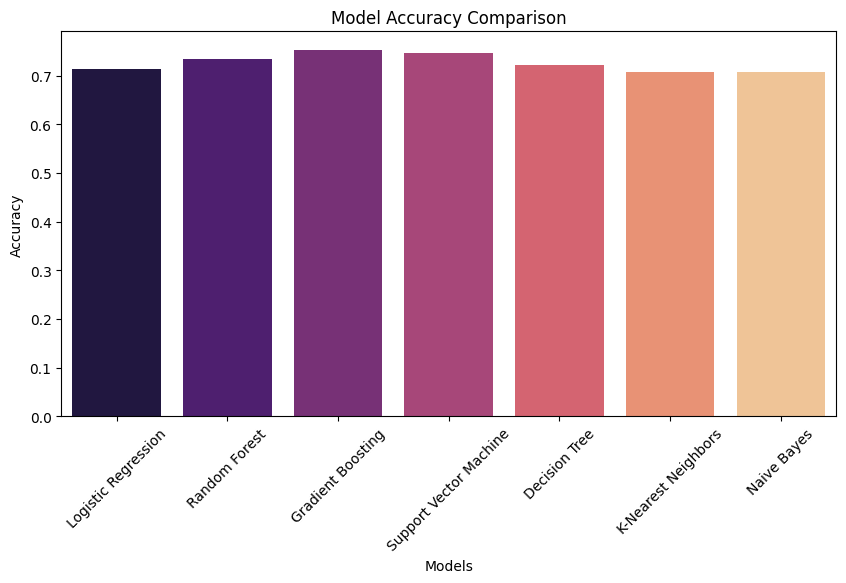

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()), palette='magma')
plt.xticks(rotation=45)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()